### Load datasets

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [26]:
complete_path = r"C:\Users\abhis\OneDrive\Desktop\data science project\UFO Sightings Data Sets\complete.csv"
scrubbed_path = r"C:\Users\abhis\OneDrive\Desktop\data science project\UFO Sightings Data Sets\scrubbed.csv"

In [27]:
complete = pd.read_csv(complete_path, sep=',', quotechar='"', on_bad_lines='skip')
scrubbed = pd.read_csv(scrubbed_path, sep=',', quotechar='"', on_bad_lines='skip')

###  Quick look

In [28]:
print("Complete dataset shape:", complete.shape)
print(complete.head())
print("Scrubbed dataset shape:", scrubbed.shape)
print(scrubbed.head())

Complete dataset shape: (88679, 11)
           datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20             1/2 hour   
4                900           15 minutes   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005    29.38421   
2  Green/Orange circular disc over Che

### Standardize Date & Time

In [29]:
complete['datetime'] = pd.to_datetime(complete['datetime'], errors='coerce')
scrubbed['datetime'] = pd.to_datetime(scrubbed['datetime'], errors='coerce')
complete['date_posted'] = pd.to_datetime(complete['date posted'], errors='coerce')
scrubbed['date_posted'] = pd.to_datetime(scrubbed['date posted'], errors='coerce')

### Normalize Columns

#### clean shape 

In [30]:
complete['shape'] = complete['shape'].str.lower().str.strip()
scrubbed['shape'] = scrubbed['shape'].str.lower().str.strip()

#### here we are feeling missing country codes

In [31]:
complete['country'] = complete['country'].fillna('unknown')
scrubbed['country'] = scrubbed['country'].fillna('unknown')

### Basic EDA

In [33]:
complete['year'] = complete['datetime'].dt.year
yearly_counts = complete['year'].value_counts().sort_index()

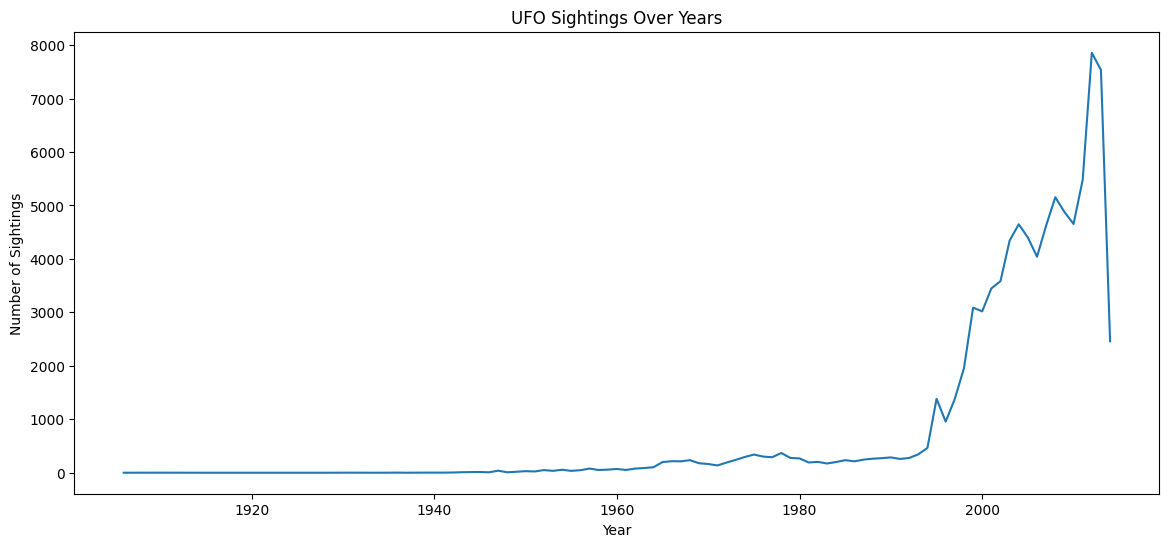

In [34]:
plt.figure(figsize=(14,6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("UFO Sightings Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Sightings")
plt.show()

#### Most Common Shapes

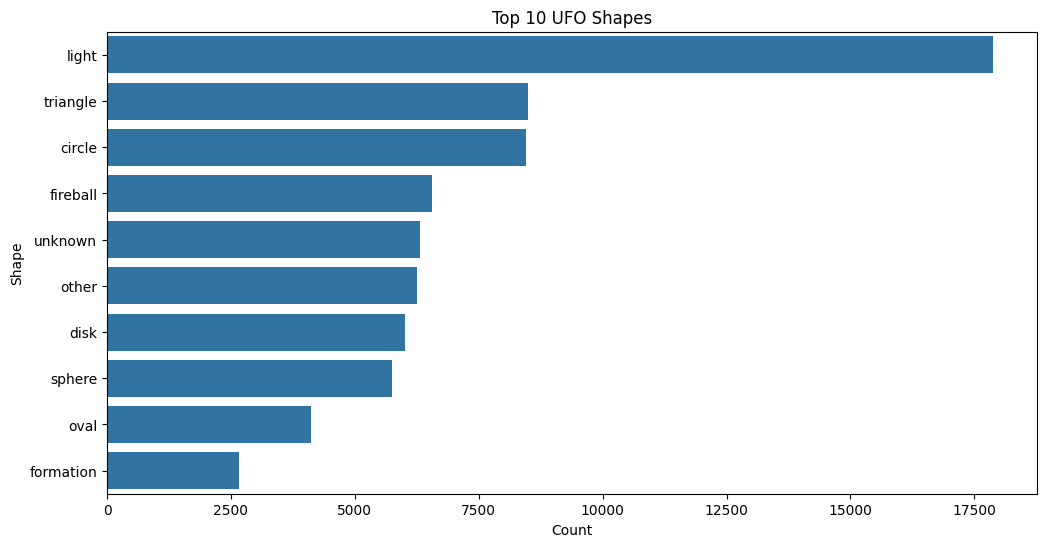

In [35]:
top_shapes = complete['shape'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_shapes.values, y=top_shapes.index)
plt.title("Top 10 UFO Shapes")
plt.xlabel("Count")
plt.ylabel("Shape")
plt.show()

#### Geospatial Hotspots

In [36]:
import folium
map_center = [37.0902, -95.7129]
ufo_map = folium.Map(location=map_center, zoom_start=4)

# 200 sightings for speed
for idx, row in complete.head(200).iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True
    ).add_to(ufo_map)
ufo_map.save("ufo_hotspots.html")

In [37]:
text = ' '.join(complete['comments'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

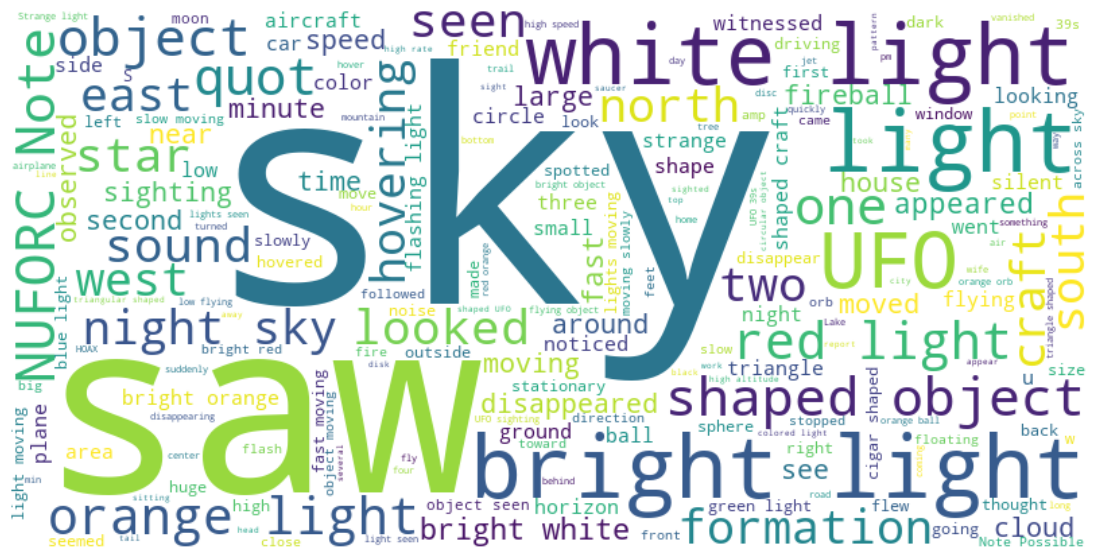

In [23]:
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()